<a href="https://colab.research.google.com/github/SaiPranaviJeedigunta/DSEM-assignments/blob/main/student_mental_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and data cleaning

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/SaiPranaviJeedigunta/Impact-of-Lifestyle-Factors-on-Students-Mental-Health/main/data/students_mental_health_survey.csv')

# Get the first few rows to understand the data
print(df.head())

# Summary of the dataset
print(df.info())
print(df.describe())

   Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0   25            Others    Male  3.56             3                 3   
1   24       Engineering  Female  2.44             0                 3   
2   19          Business  Female  3.74             4                 0   
3   19  Computer Science    Male  3.65             2                 1   
4   18          Business    Male  3.40             3                 3   

   Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0              2          Good          Moderate         Good       Moderate   
1              0       Average               Low      Average            Low   
2              3          Good               Low      Average       Moderate   
3              0       Average               Low      Average       Moderate   
4              4          Good               Low      Average           High   

  Relationship_Status Substance_Use Counseling_Service_Use Family_History 

The dataset consists of 20 columns and 7,022 rows, with information on various factors such as age, course, gender, CGPA, stress levels, and more, related to students. Here’s a summary of the data and its characteristics:

#### Data Summary:
- **Age:** Continuous variable with values ranging from 18 to 35.
- **Course:** Categorical variable indicating the course the student is enrolled in.
- **Gender:** Categorical variable with values 'Male' and 'Female.'
- **CGPA:** Continuous variable representing students' CGPA, with a small number of missing values (12).
- **Stress_Level, Depression_Score, Anxiety_Score:** Integer scores ranging from 0 to 5, indicating different mental health aspects.
- **Sleep_Quality, Physical_Activity, Diet_Quality, Social_Support:** Categorical variables reflecting the quality and levels of different lifestyle factors.
- **Relationship_Status:** Categorical variable (e.g., Single, Married, In a Relationship).
- **Substance_Use:** Categorical variable with 15 missing values.
- **Counseling_Service_Use:** Categorical variable indicating whether the student has used counseling services.
- **Family_History, Chronic_Illness:** Categorical variables indicating family history and presence of chronic illness.
- **Financial_Stress:** Integer variable indicating financial stress level (0-5).
- **Extracurricular_Involvement:** Categorical variable reflecting involvement level.
- **Semester_Credit_Load:** Continuous variable representing the number of credits the student is taking.
- **Residence_Type:** Categorical variable indicating whether the student lives on-campus or off-campus.

#### Missing Values:
- **CGPA:** 12 missing values.
- **Substance_Use:** 15 missing values.

#### Data Distribution:
- The students’ ages range from 18 to 35, with a mean age of about 23 years.
- The CGPA has a mean of 3.49, with values ranging from 2.44 to 4.0.
- Stress, depression, and anxiety scores are distributed across the full range (0-5), with mean scores around 2.3.
- Financial stress varies across the sample, with a mean of about 2.45 on a 0-5 scale.
- Semester credit load has a mean of about 22 credits, ranging from 15 to 29.

This dataset appears to be well-suited for analyzing the impact of lifestyle factors on mental health. The small amount of missing data in CGPA and Substance_Use can be handled through imputation or by removing those rows.

Would you like to explore any specific aspects of this dataset or need guidance on how to proceed with the analysis?

In [3]:
# Check for missing values
print(df.isnull().sum())

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64


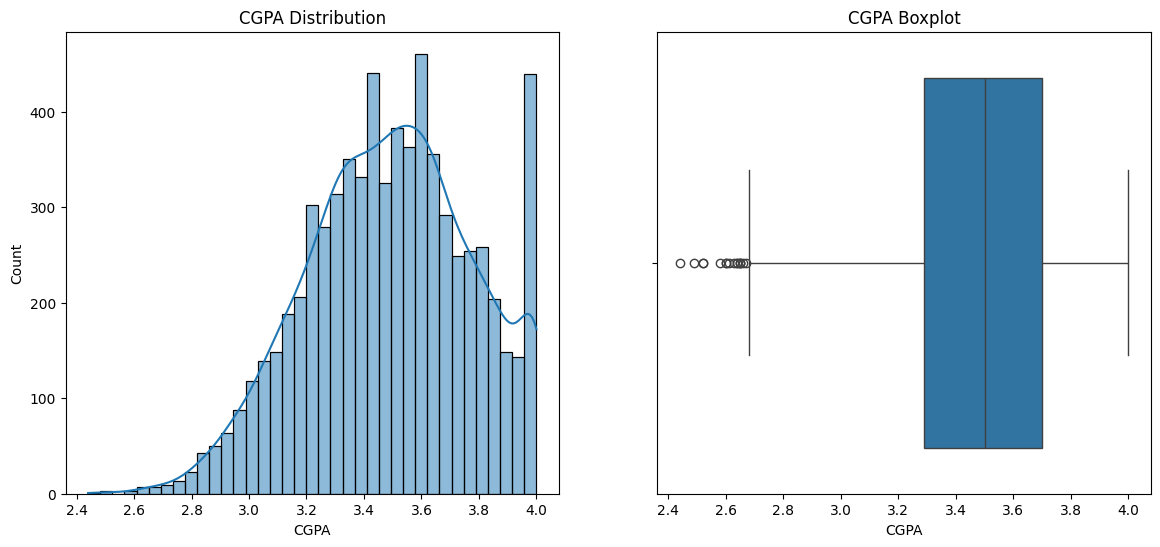

Shapiro-Wilk test p-value for CGPA: 6.0322429042081385e-25
Skewness for CGPA: -0.188005942063646
Kurtosis for CGPA: -0.4371271584920384


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7010.
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Plotting a histogram and a boxplot for CGPA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'].dropna(), kde=True)
plt.title('CGPA Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['CGPA'].dropna())
plt.title('CGPA Boxplot')

plt.show()

# Checking for normality using the Shapiro-Wilk test
shapiro_test = shapiro(df['CGPA'].dropna())
print(f"Shapiro-Wilk test p-value for CGPA: {shapiro_test.pvalue}")

# Check the skewness and kurtosis
cgpa_skewness = df['CGPA'].skew()
cgpa_kurtosis = df['CGPA'].kurtosis()
print(f"Skewness for CGPA: {cgpa_skewness}")
print(f"Kurtosis for CGPA: {cgpa_kurtosis}")


The results indicate the following:

1. Shapiro-Wilk Test p-value: 6.03e-25

This very low p-value suggests that the CGPA data is not normally distributed. When the p-value is less than 0.05, we reject the null hypothesis of the Shapiro-Wilk test, which assumes that the data is normally distributed.

2. Skewness: -0.188

The skewness is slightly negative, indicating a slight left skew. However, since it’s close to 0, the distribution is almost symmetric.

3. Kurtosis: -0.437

This negative kurtosis value indicates that the distribution has lighter tails than a normal distribution (less prone to outliers).

**Imputation Decision**

Given these results:


*   Not Normally Distributed: Since the data is not normally distributed, using the median for imputation would be a better choice over the mean.
*   Slight Skewness: The data is only slightly skewed, but the lack of normality still suggests that the median is more robust against any potential outliers.

In [5]:
# Impute missing values in CGPA with the median
median_cgpa = df['CGPA'].median()
df['CGPA'].fillna(median_cgpa, inplace=True)

# For Substance_Use, using the mode
mode_substance_use = df['Substance_Use'].mode()[0]
df['Substance_Use'].fillna(mode_substance_use, inplace=True)


In [6]:
# Check for missing values
print(df.isnull().sum())

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64


# EDA

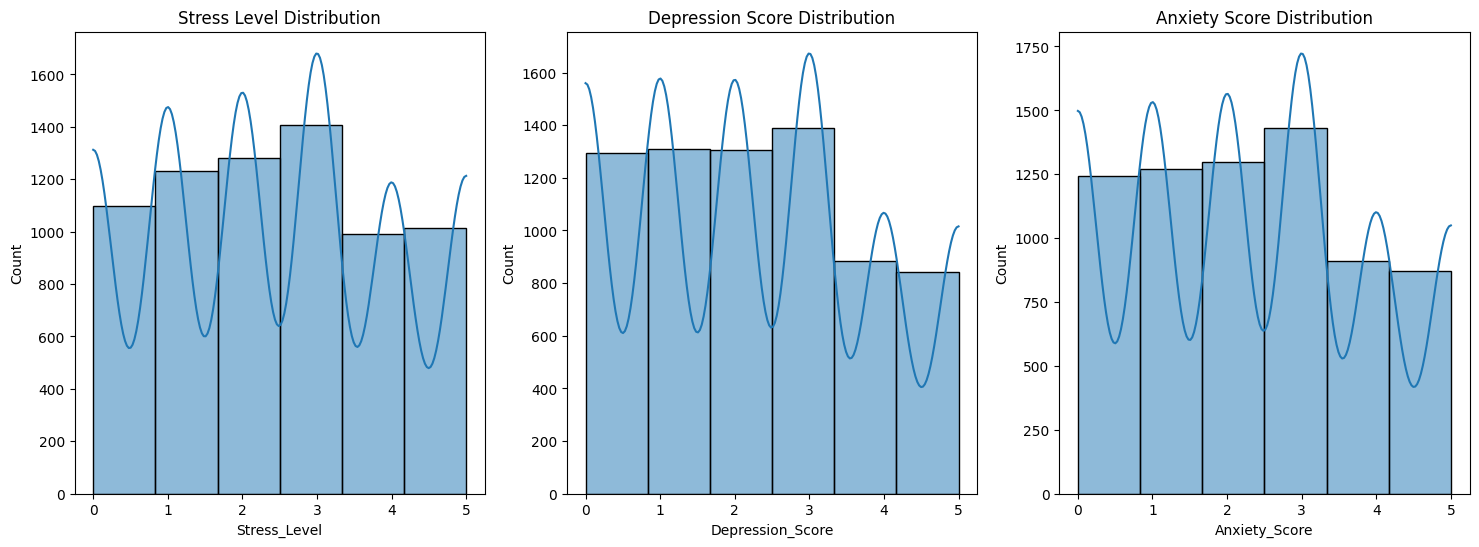

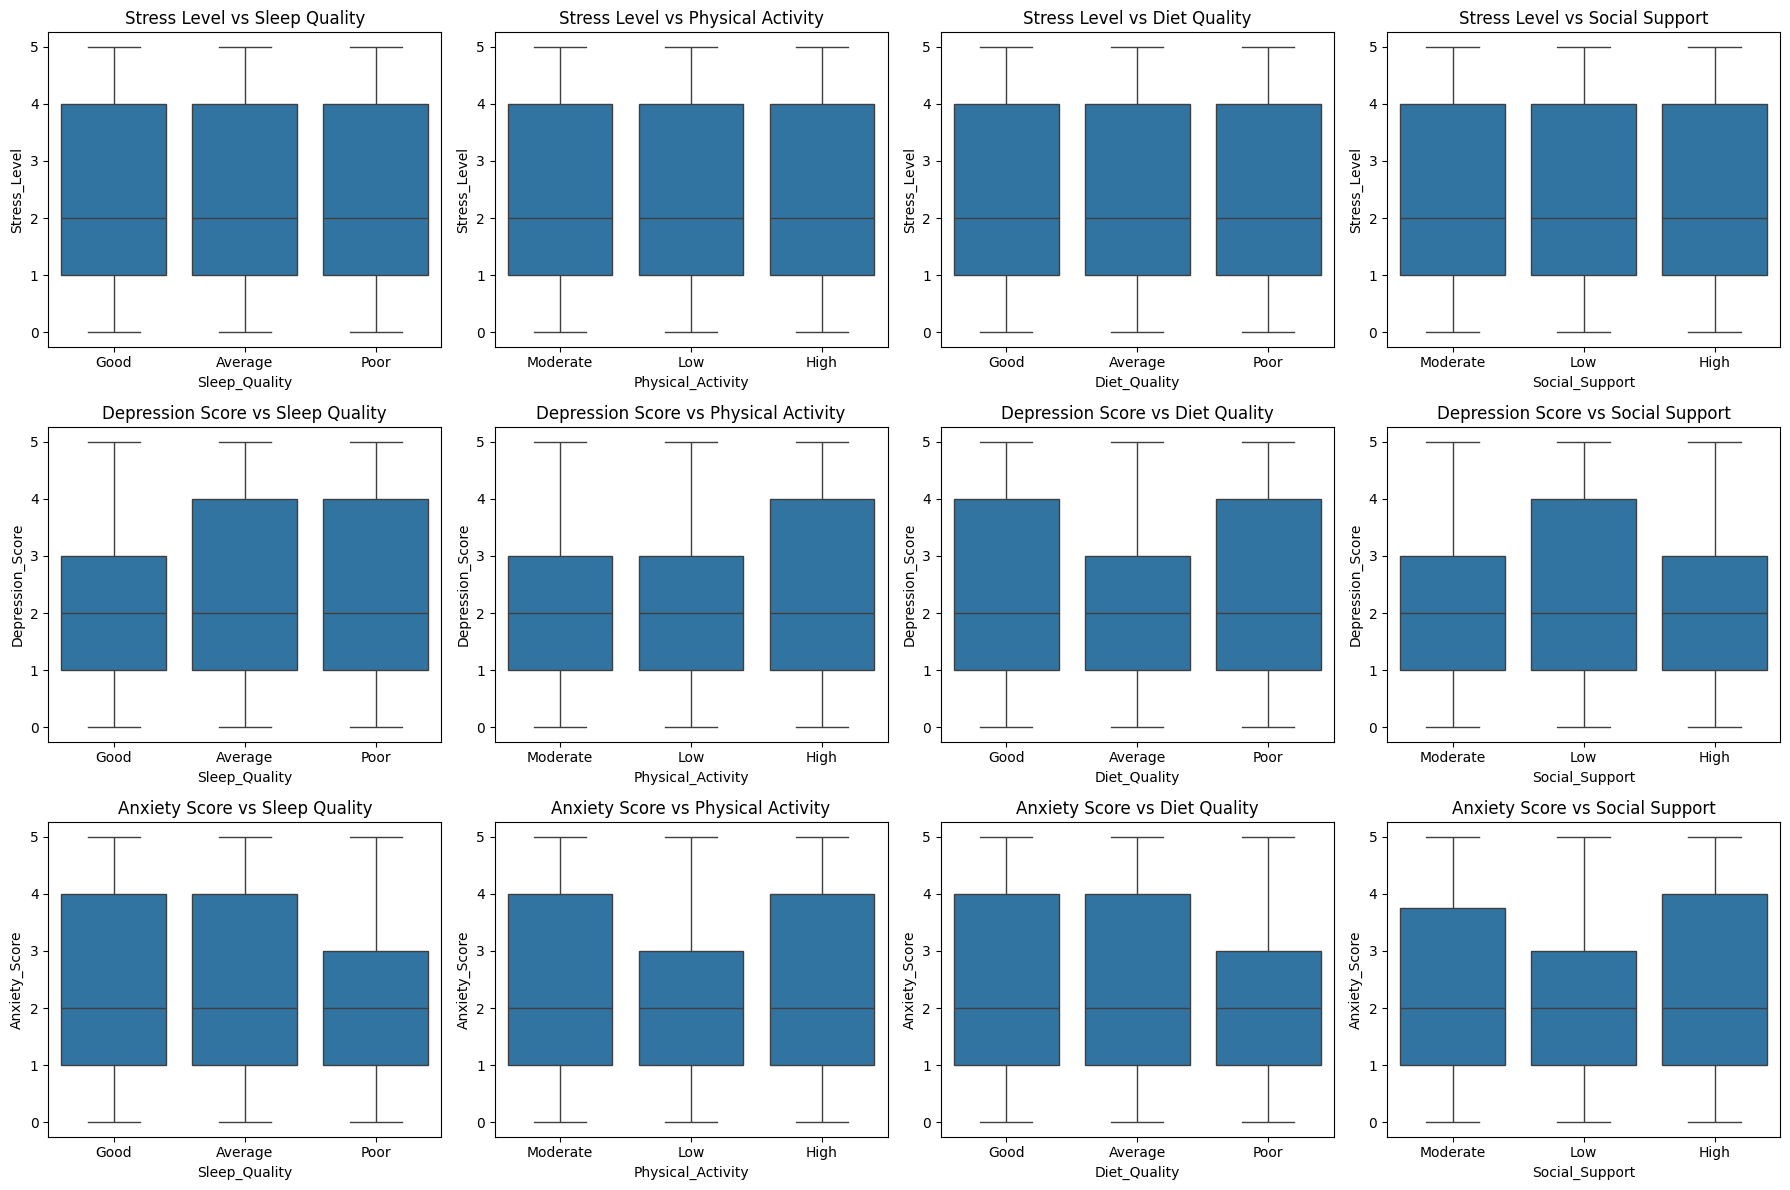

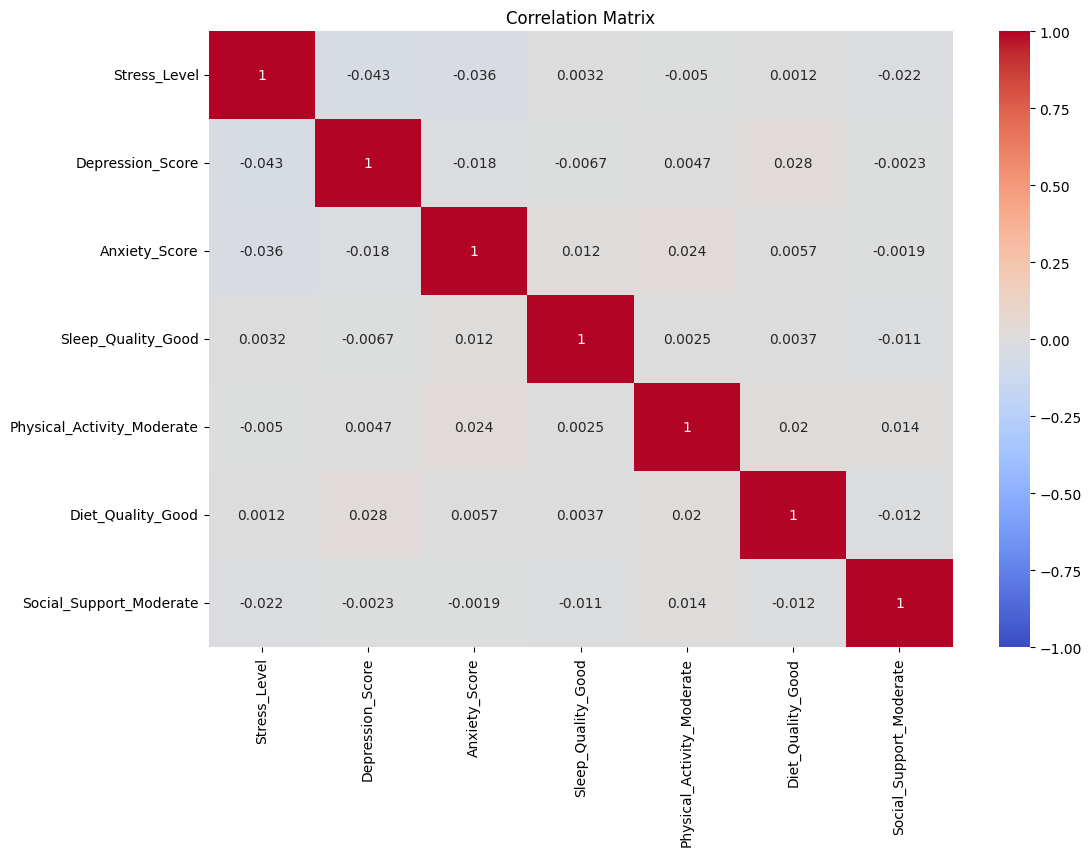

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the distribution of mental health scores
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Stress_Level'], bins=6, kde=True)
plt.title('Stress Level Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Depression_Score'], bins=6, kde=True)
plt.title('Depression Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Anxiety_Score'], bins=6, kde=True)
plt.title('Anxiety Score Distribution')

plt.show()

# Step 2: Visualize relationships between lifestyle factors and mental health scores
plt.figure(figsize=(18, 12))

plt.subplot(3, 4, 1)
sns.boxplot(x='Sleep_Quality', y='Stress_Level', data=df)
plt.title('Stress Level vs Sleep Quality')

plt.subplot(3, 4, 2)
sns.boxplot(x='Physical_Activity', y='Stress_Level', data=df)
plt.title('Stress Level vs Physical Activity')

plt.subplot(3, 4, 3)
sns.boxplot(x='Diet_Quality', y='Stress_Level', data=df)
plt.title('Stress Level vs Diet Quality')

plt.subplot(3, 4, 4)
sns.boxplot(x='Social_Support', y='Stress_Level', data=df)
plt.title('Stress Level vs Social Support')

plt.subplot(3, 4, 5)
sns.boxplot(x='Sleep_Quality', y='Depression_Score', data=df)
plt.title('Depression Score vs Sleep Quality')

plt.subplot(3, 4, 6)
sns.boxplot(x='Physical_Activity', y='Depression_Score', data=df)
plt.title('Depression Score vs Physical Activity')

plt.subplot(3, 4, 7)
sns.boxplot(x='Diet_Quality', y='Depression_Score', data=df)
plt.title('Depression Score vs Diet Quality')

plt.subplot(3, 4, 8)
sns.boxplot(x='Social_Support', y='Depression_Score', data=df)
plt.title('Depression Score vs Social Support')

plt.subplot(3, 4, 9)
sns.boxplot(x='Sleep_Quality', y='Anxiety_Score', data=df)
plt.title('Anxiety Score vs Sleep Quality')

plt.subplot(3, 4, 10)
sns.boxplot(x='Physical_Activity', y='Anxiety_Score', data=df)
plt.title('Anxiety Score vs Physical Activity')

plt.subplot(3, 4, 11)
sns.boxplot(x='Diet_Quality', y='Anxiety_Score', data=df)
plt.title('Anxiety Score vs Diet Quality')

plt.subplot(3, 4, 12)
sns.boxplot(x='Social_Support', y='Anxiety_Score', data=df)
plt.title('Anxiety Score vs Social Support')

plt.tight_layout()
plt.show()

# Step 3: Correlation analysis
# Convert categorical variables to numerical for correlation analysis
df_encoded = pd.get_dummies(df, columns=['Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded[['Stress_Level', 'Depression_Score', 'Anxiety_Score',
                                 'Sleep_Quality_Good', 'Physical_Activity_Moderate', 'Diet_Quality_Good', 'Social_Support_Moderate']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


This  series of box plots shows the relationships between mental health scores (Stress Level, Depression Score, and Anxiety Score) and various lifestyle factors (Sleep Quality, Physical Activity, Diet Quality, and Social Support). Here’s a breakdown of what each plot represents:

### Top Row (Stress Level)
1. **Stress Level vs Sleep Quality**
   - **Good, Average, Poor**: Stress levels are compared across different sleep quality categories. The median stress level seems similar across categories, with slight variability.

2. **Stress Level vs Physical Activity**
   - **Moderate, Low, High**: Stress levels are compared across different levels of physical activity. The median stress level doesn't change much across the physical activity levels.

3. **Stress Level vs Diet Quality**
   - **Good, Average, Poor**: Stress levels are compared across different diet quality categories. The median stress level appears consistent, with minor differences across categories.

4. **Stress Level vs Social Support**
   - **Moderate, Low, High**: Stress levels are compared across different levels of social support. The median stress level remains relatively constant.

### Middle Row (Depression Score)
5. **Depression Score vs Sleep Quality**
   - **Good, Average, Poor**: Depression scores are compared across sleep quality categories. The median score slightly increases as sleep quality decreases.

6. **Depression Score vs Physical Activity**
   - **Moderate, Low, High**: Depression scores are compared across physical activity levels. Higher physical activity might be associated with lower depression scores.

7. **Depression Score vs Diet Quality**
   - **Good, Average, Poor**: Depression scores are compared across diet quality categories. Poor diet quality seems to be associated with higher depression scores.

8. **Depression Score vs Social Support**
   - **Moderate, Low, High**: Depression scores are compared across levels of social support. Higher social support might be associated with lower depression scores.

### Bottom Row (Anxiety Score)
9. **Anxiety Score vs Sleep Quality**
   - **Good, Average, Poor**: Anxiety scores are compared across sleep quality categories. The median anxiety score seems to slightly increase as sleep quality decreases.

10. **Anxiety Score vs Physical Activity**
    - **Moderate, Low, High**: Anxiety scores are compared across physical activity levels. Higher physical activity might be associated with lower anxiety scores.

11. **Anxiety Score vs Diet Quality**
    - **Good, Average, Poor**: Anxiety scores are compared across diet quality categories. Poor diet quality seems to be associated with higher anxiety scores.

12. **Anxiety Score vs Social Support**
    - **Moderate, Low, High**: Anxiety scores are compared across levels of social support. Higher social support might be associated with lower anxiety scores.

### General Observations
- The box plots suggest that there is some relationship between mental health scores (Stress, Depression, Anxiety) and lifestyle factors (Sleep Quality, Physical Activity, Diet Quality, Social Support).
- In general, better lifestyle factors (e.g., good sleep quality, higher physical activity, good diet quality, high social support) are associated with lower mental health scores, indicating better mental health.
- However, the relationships are not very strong, as the median scores do not vary dramatically across the categories in most cases.

Thie correlation matrix shows the Pearson correlation coefficients between various mental health scores (Stress Level, Depression Score, and Anxiety Score) and lifestyle factors (Sleep Quality, Physical Activity, Diet Quality, and Social Support). Here’s a detailed explanation of each figure in the matrix:

### Diagonal (from top left to bottom right)
- **Stress_Level (1.0)**, **Depression_Score (1.0)**, **Anxiety_Score (1.0)**, etc.: These values are all 1 because each variable is perfectly correlated with itself.

### Off-diagonal elements (correlation between different variables)
1. **Stress_Level** correlations:
   - **-0.043** with **Depression_Score**: Weak negative correlation, suggesting that as stress increases, depression might slightly decrease, but the relationship is very weak.
   - **-0.036** with **Anxiety_Score**: Weak negative correlation with anxiety.
   - **0.0032** with **Sleep_Quality_Good**: Very weak positive correlation with good sleep quality.
   - **-0.005** with **Physical_Activity_Moderate**: Very weak negative correlation with moderate physical activity.
   - **0.0012** with **Diet_Quality_Good**: Very weak positive correlation with good diet quality.
   - **-0.022** with **Social_Support_Moderate**: Weak negative correlation with moderate social support.

2. **Depression_Score** correlations:
   - **-0.018** with **Anxiety_Score**: Very weak negative correlation.
   - **-0.0067** with **Sleep_Quality_Good**: Very weak negative correlation with good sleep quality.
   - **0.0047** with **Physical_Activity_Moderate**: Very weak positive correlation with moderate physical activity.
   - **0.028** with **Diet_Quality_Good**: Weak positive correlation with good diet quality.
   - **-0.0023** with **Social_Support_Moderate**: Very weak negative correlation with moderate social support.

3. **Anxiety_Score** correlations:
   - **0.012** with **Sleep_Quality_Good**: Very weak positive correlation with good sleep quality.
   - **0.024** with **Physical_Activity_Moderate**: Weak positive correlation with moderate physical activity.
   - **0.0057** with **Diet_Quality_Good**: Very weak positive correlation with good diet quality.
   - **-0.0019** with **Social_Support_Moderate**: Very weak negative correlation with moderate social support.

4. **Sleep_Quality_Good** correlations:
   - **0.0025** with **Physical_Activity_Moderate**: Very weak positive correlation with moderate physical activity.
   - **0.0037** with **Diet_Quality_Good**: Very weak positive correlation with good diet quality.
   - **-0.011** with **Social_Support_Moderate**: Very weak negative correlation with moderate social support.

5. **Physical_Activity_Moderate** correlations:
   - **0.02** with **Diet_Quality_Good**: Weak positive correlation with good diet quality.
   - **0.014** with **Social_Support_Moderate**: Very weak positive correlation with moderate social support.

6. **Diet_Quality_Good** correlations:
   - **-0.012** with **Social_Support_Moderate**: Very weak negative correlation with moderate social support.

### General Observations:
- **Correlation Strength**: The correlations between these variables are all very weak, with values close to zero, indicating little to no linear relationship between them.
- **Direction of Correlation**: The signs of the correlation coefficients (positive or negative) indicate the direction of the relationship (whether one variable tends to increase or decrease as the other does). However, given the very low magnitude of these correlations, these relationships are likely not practically significant.

This matrix suggests that in this dataset, there are very weak linear relationships between the variables analyzed.